In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Load dataset
data = pd.read_csv('/Users/shaneab/Projects/Machine Learning/Expression recognition/fer20131.csv')
X = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in data['pixels']])
y = data['emotion'].values


In [3]:
# Normalize pixel values
X = X / 255.0

In [4]:
#Normalisasi Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863],
       [0.59215686, 0.58823529, 0.57647059, ..., 0.75686275, 0.71764706,
        0.72156863],
       [0.90588235, 0.83137255, 0.61176471, ..., 0.34509804, 0.43137255,
        0.59607843],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.60392157, 0.52156863,
        0.44313725],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.1372549 , 0.11764706,
        0.10980392],
       [0.0745098 , 0.05098039, 0.05490196, ..., 0.74117647, 0.78039216,
        0.78823529]])

In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train


array([[0.01568627, 0.01568627, 0.01568627, ..., 0.01176471, 0.01176471,
        0.01176471],
       [0.11764706, 0.1254902 , 0.16078431, ..., 0.42352941, 0.45490196,
        0.4627451 ],
       [0.98431373, 0.96078431, 0.81176471, ..., 0.24313725, 0.00784314,
        0.04313725],
       ...,
       [0.38039216, 0.36470588, 0.23921569, ..., 0.32156863, 0.41568627,
        0.63529412],
       [0.99607843, 0.89411765, 0.84705882, ..., 0.74509804, 0.85490196,
        0.87843137],
       [0.46666667, 0.39607843, 0.07058824, ..., 0.        , 0.        ,
        0.        ]])

In [6]:
# # Create the kNN classifier
# knn_model = KNeighborsClassifier(n_neighbors=3)

# # Train the model
# knn_model.fit(X_train, y_train)

param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_model.fit(X_train, y_train)
print("Best Parameters:", knn_model.best_params_)

Best Parameters: {'n_neighbors': 1}


In [7]:
# Make Prediciton
best_knn = knn_model.best_estimator_
best_knn
y_pred = best_knn.predict(X_test)
y_pred

array([3, 3, 6, ..., 5, 2, 3])

In [8]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4031763722485372
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.33      0.36       985
           1       0.35      0.58      0.43       102
           2       0.41      0.40      0.41      1043
           3       0.45      0.42      0.43      1765
           4       0.34      0.32      0.33      1210
           5       0.57      0.56      0.56       795
           6       0.32      0.40      0.36      1278

    accuracy                           0.40      7178
   macro avg       0.41      0.43      0.41      7178
weighted avg       0.41      0.40      0.40      7178



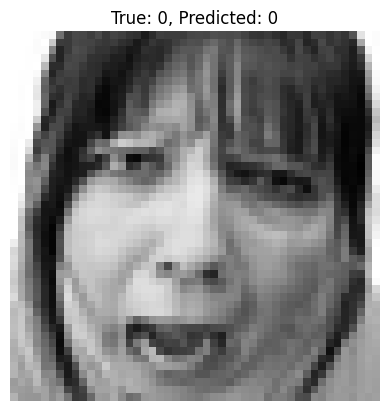

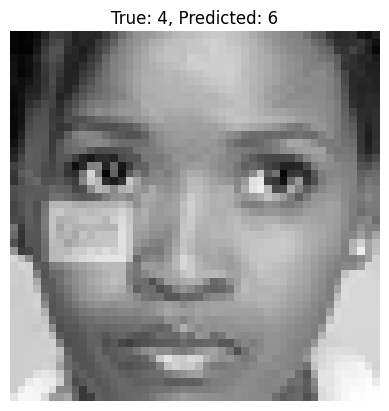

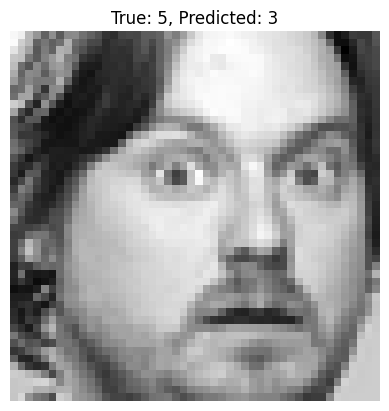

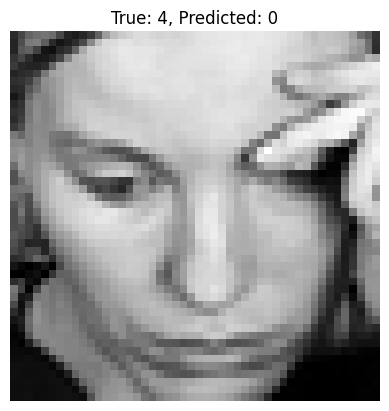

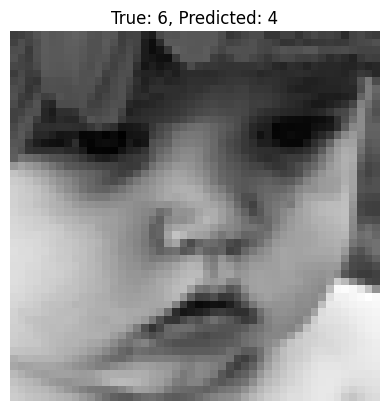

In [9]:
# Visualize random predictions
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    image = X_test[idx].reshape(48, 48)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
    plt.show()